In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Loading a fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_train_full.dtype

dtype('uint8')

In [ ]:
x_train_full[0].shape

(28, 28)

In [ ]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
#Our dataset is already divided into training and testing dataset so we divide train dataset further as a validate set.
#Also convert intensities of pixel into 0-1 range by dividing them with 255.0 so that dtype also change to float.

x_valid, x_train = x_train_full[:5000]/255.0 , x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[1]]

'T-shirt/top'

In [ ]:
#Creating sequencial model
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[1].name

'dense_12'

In [ ]:
model.get_layer('dense_12').name

'dense_12'

In [ ]:
weights, biases = model.layers[1].get_weights()
print(weights)
print("\n")
print(biases)

[[-0.02507088  0.01054478 -0.01254238 ... -0.03561898  0.02662572
  -0.01405814]
 [-0.01598812 -0.04405341  0.06672415 ...  0.02771416 -0.07424068
   0.00618991]
 [-0.00395412 -0.00574566 -0.02330059 ... -0.05347693 -0.00442496
   0.05194138]
 ...
 [ 0.00399983  0.02578701  0.04907268 ...  0.04694302  0.03946257
   0.02297544]
 [-0.07035135  0.00399244  0.00842667 ...  0.05504663  0.02670594
  -0.04181311]
 [-0.00836418 -0.00943299 -0.05897918 ...  0.06742005 -0.05652096
   0.05581442]]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [ ]:
history= model.fit(x_train, y_train, epochs = 30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7160 - accuracy: 0.7661 - val_loss: 0.5049 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4853 - accuracy: 0.8301 - val_loss: 0.5553 - val_accuracy: 0.7986
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4419 - accuracy: 0.8439 - val_loss: 0.4237 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8546 - val_loss: 0.4064 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3971 - accuracy: 0.8603 - val_loss: 0.3839 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3809 - accuracy: 0.8676 - val_loss: 0.3971 - val_accuracy: 0.8588
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3689 - accuracy: 0.8700 - val_loss: 0.3929 - val_accurac

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
history.history

{'loss': [0.716020941734314,
  0.4852764308452606,
  0.44192877411842346,
  0.41495567560195923,
  0.3971163034439087,
  0.38086381554603577,
  0.36885035037994385,
  0.35751068592071533,
  0.34638074040412903,
  0.3373011350631714,
  0.3296237885951996,
  0.32167211174964905,
  0.3143370747566223,
  0.30736079812049866,
  0.3016066551208496,
  0.2944769561290741,
  0.28940892219543457,
  0.2831854522228241,
  0.27742552757263184,
  0.2718433737754822,
  0.26754194498062134,
  0.2629151940345764,
  0.25921696424484253,
  0.2531913220882416,
  0.24947242438793182,
  0.24414128065109253,
  0.2409302145242691,
  0.23646995425224304,
  0.2324143946170807,
  0.2287253737449646],
 'accuracy': [0.7660545706748962,
  0.8301454782485962,
  0.843890905380249,
  0.8545818328857422,
  0.8602908849716187,
  0.8676363825798035,
  0.8700181841850281,
  0.8724545240402222,
  0.876800000667572,
  0.8801636099815369,
  0.8819090723991394,
  0.8856727480888367,
  0.8876000046730042,
  0.8900908827781677,

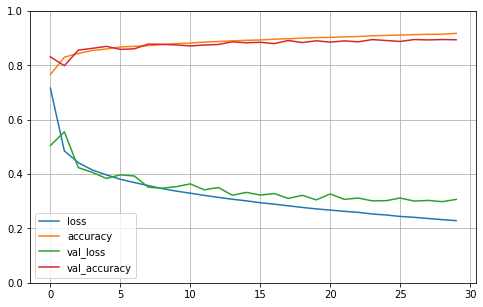

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 76.7379 - accuracy: 0.8283


[76.73794555664062, 0.8282999992370605]

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba

1/1 [==============================] - 0s 31ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(x_new)
classes = np.argmax(y_pred, axis=1)
classes

1/1 [==============================] - 0s 22ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)